In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.style.use('fivethirtyeight')

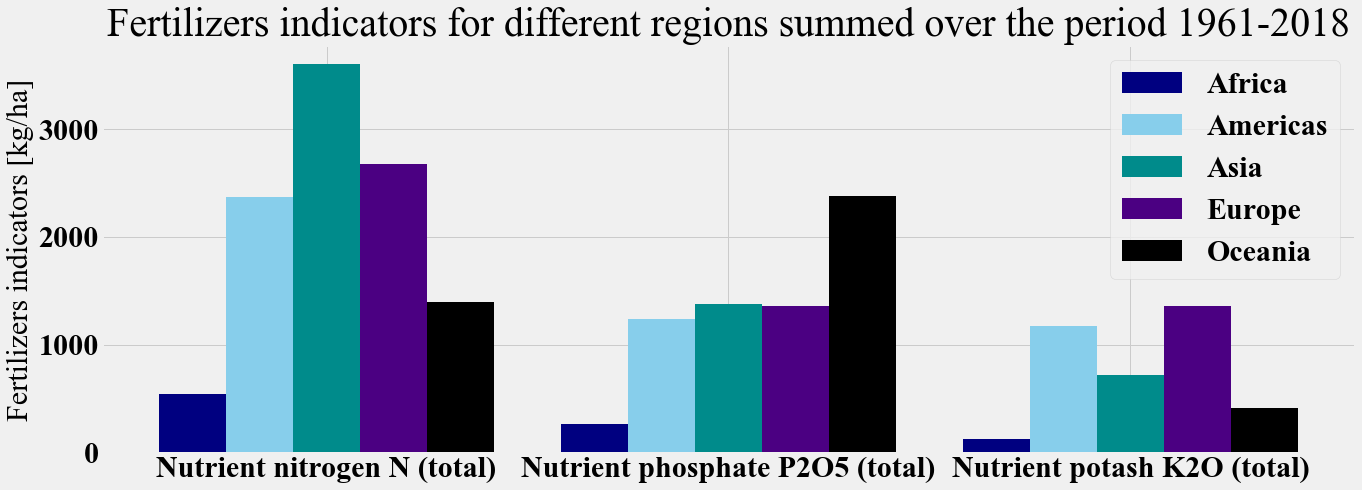

In [2]:
# Nutrients by region
# -----------------------------------------------------------------------------------------------------------------------
nutrients_region = pd.read_csv('D:/studying/RheinWaalUni/3d semester/data procurement/nutrients_kg_ha/FAOSTAT_data_4-27-2021_(by region).csv')

regions_x = nutrients_region['Area'].unique()
nutrients_y = nutrients_region['Item'].unique()


def indicators_per_nutrient_mean(dataset, nutrient):
    indicators_y = {}
    for area in dataset['Area'].unique():
        area_mean = dataset.loc[(dataset['Item'] == nutrient) & (dataset['Area'] == area)]['Value'].mean()
        indicators_y[area] = area_mean

    return indicators_y


def indicators_per_reg_sum(region):
    indicators_y = []
    for nutrient in nutrients_y:
        nutr_sum = nutrients_region.loc[(nutrients_region['Item'] == nutrient)
                                        & (nutrients_region['Area'] == region)]['Value'].sum()
        indicators_y.append(nutr_sum)
    return indicators_y


font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 30}
plt.rc('font', **font)
plt.figure(num=None, figsize=(20, 7))

y_pos = np.array([0, 1.2, 2.4])

width = 0.2

plt.bar(y_pos + 0, indicators_per_reg_sum('Africa'), width, color='navy', label='Africa')
plt.bar(y_pos + 0.2, indicators_per_reg_sum('Americas'), width, color='skyblue', label='Americas')
plt.bar(y_pos + 0.4, indicators_per_reg_sum('Asia'), width, color='darkcyan', label='Asia')
plt.bar(y_pos + 0.6, indicators_per_reg_sum('Europe'), width, color='indigo', label='Europe')
plt.bar(y_pos + 0.8, indicators_per_reg_sum('Oceania'), width, color='black', label='Oceania')

plt.xticks(y_pos + 0.4, nutrients_y)
plt.legend(('Africa','Americas', 'Asia', 'Europe', 'Oceania'))
plt.ylabel('Fertilizers indicators [kg/ha]', fontsize=30)
# plt.xlabel('Different X-Axis labels')
plt.title('Fertilizers indicators for different regions summed over the period 1961-2018', fontsize=40)
plt.show()

{'Egypt': 244.05086206896553, 'Mauritius': 104.1598275862069, 'South Africa': 26.04224137931034, 'Seychelles': 21.736666666666668}


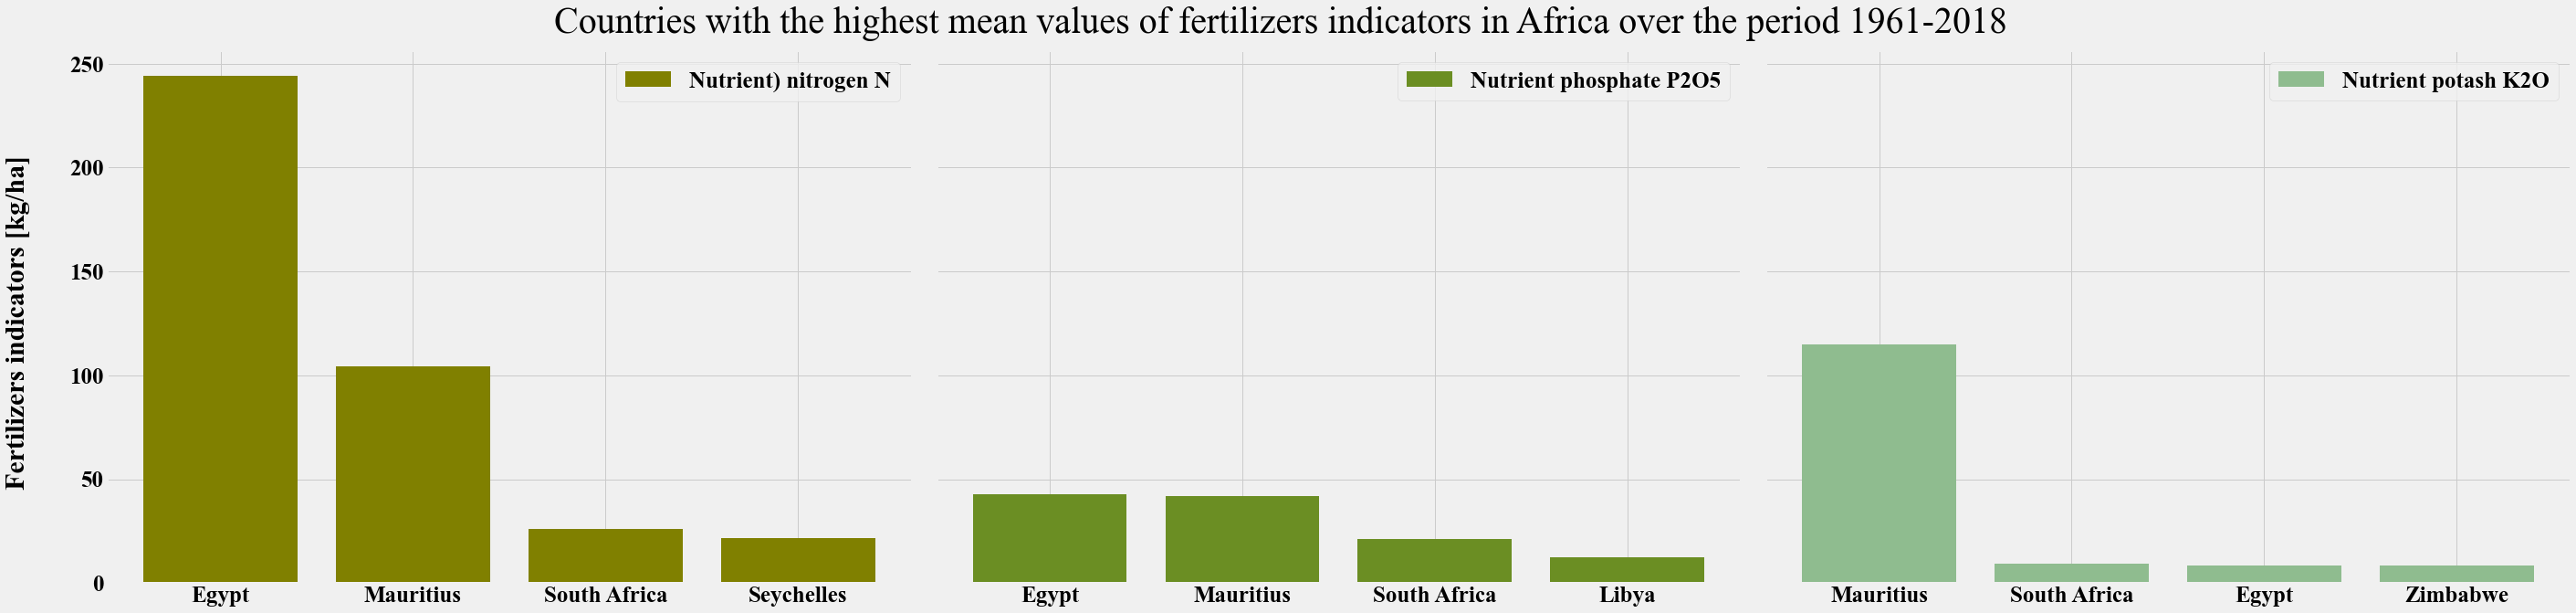

{'Costa Rica': 107.9189655172414, 'Barbados': 107.72603448275864, 'Saint Lucia': 102.1271153846154, 'Suriname': 85.35810344827587}


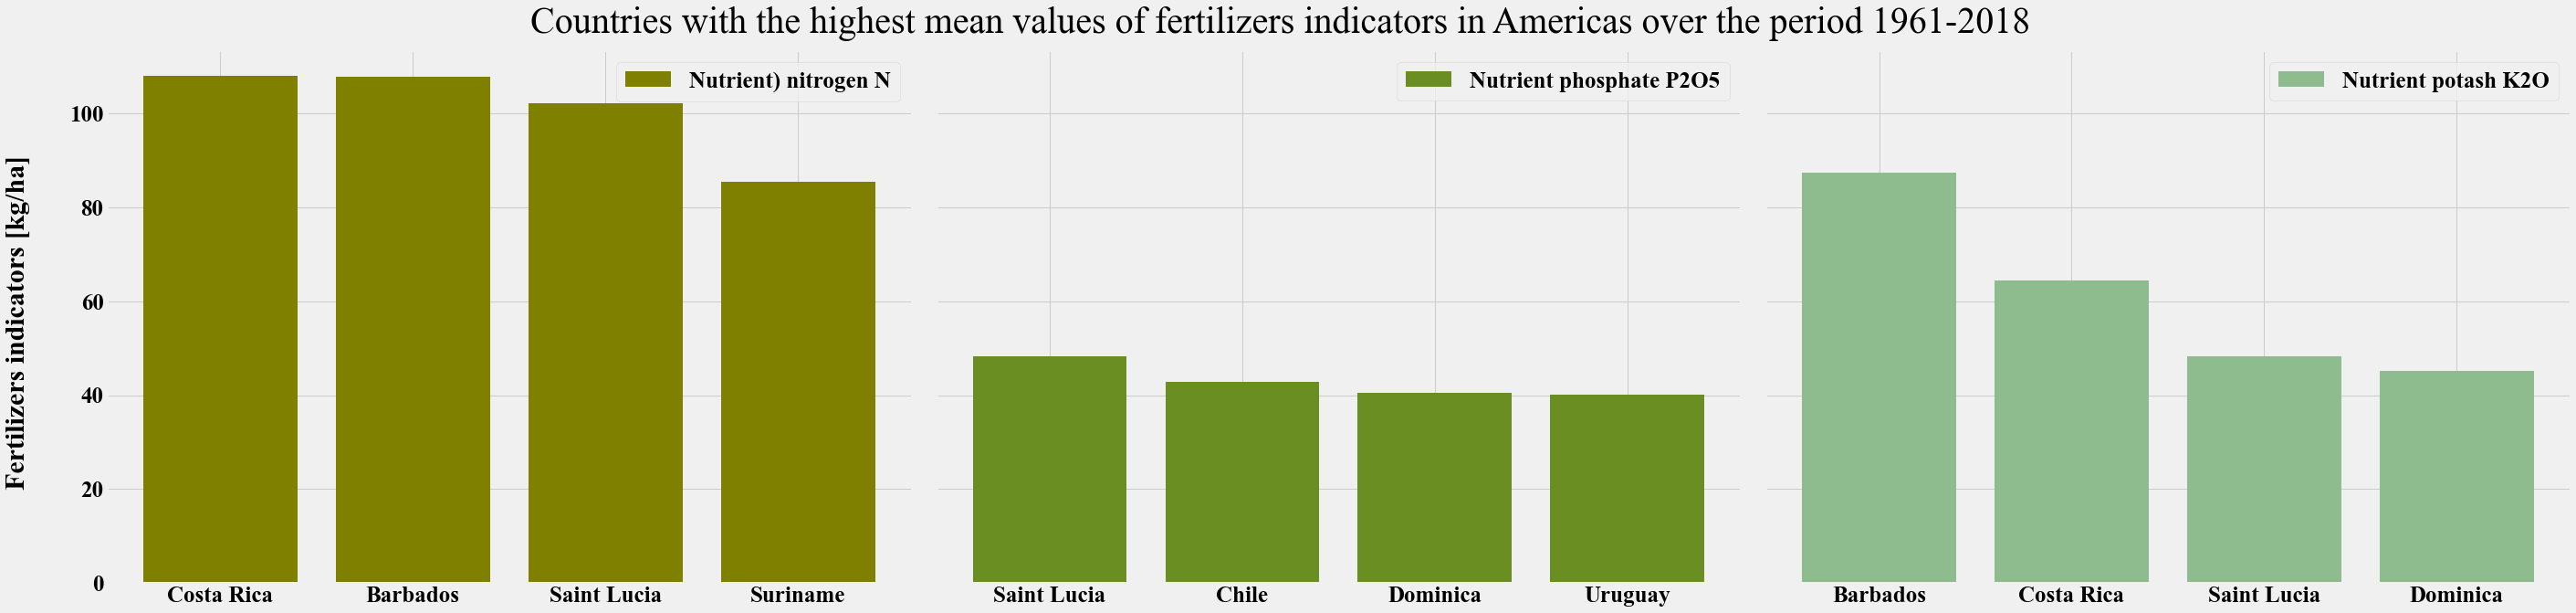

{'China, Taiwan': 211.4829411764706, 'Republic of Korea': 175.21758620689656, 'UAE': 147.82127659574468, 'China, mainland': 130.50655172413792}


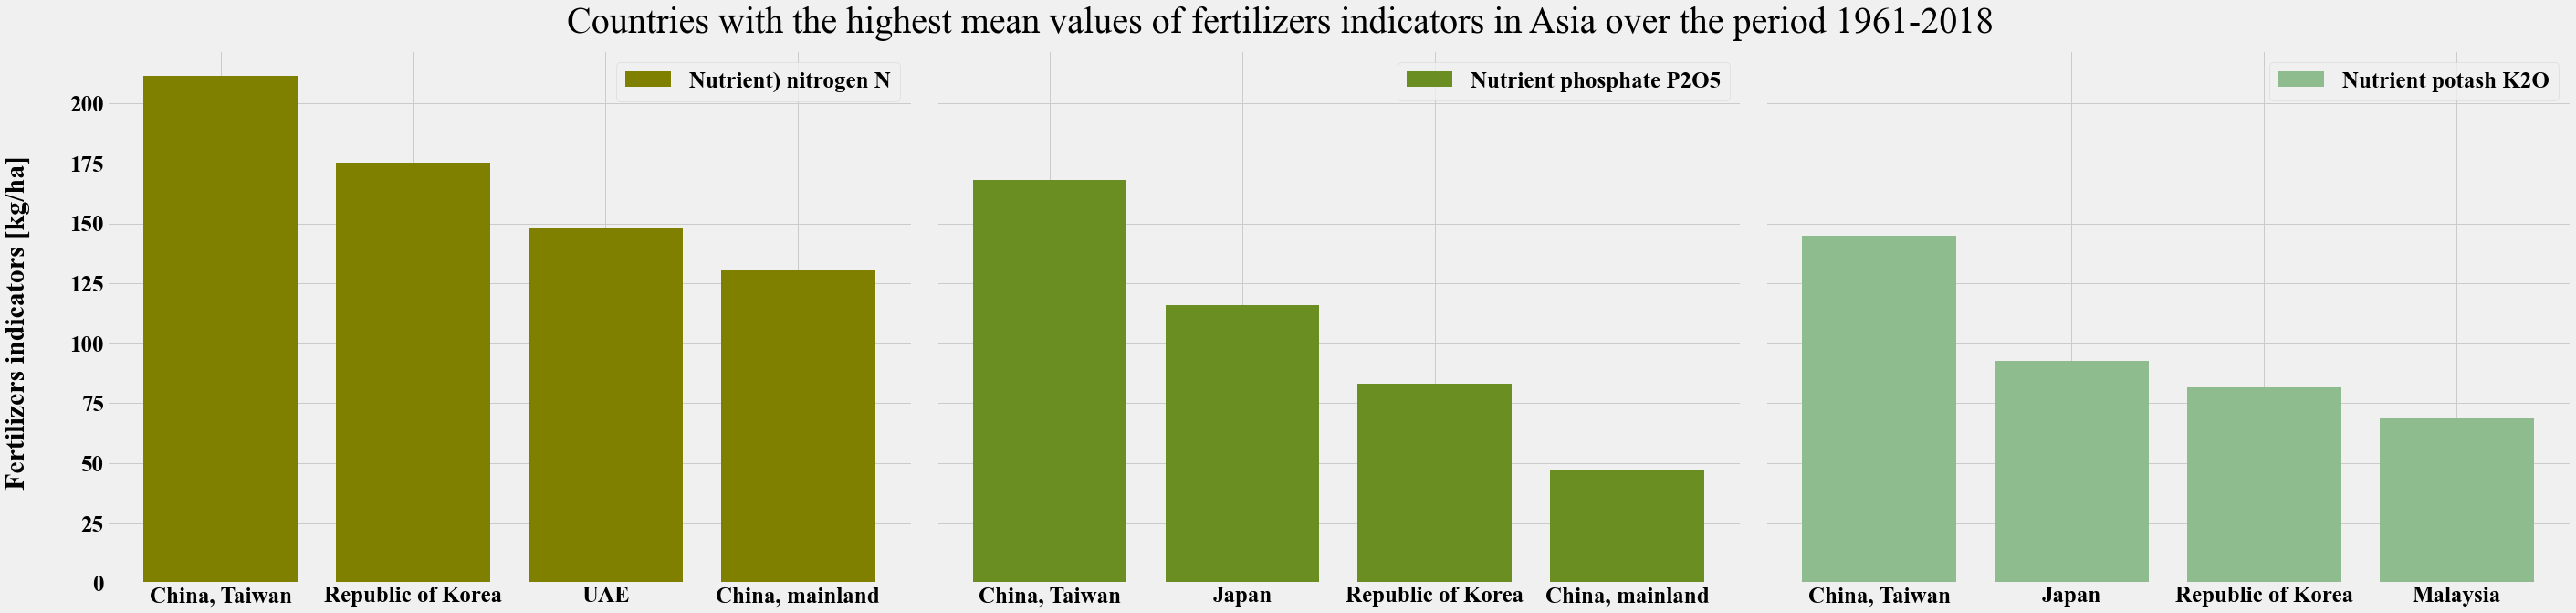

{'Luxembourg': 215.13529411764708, 'Belgium-Luxembourg': 200.3835897435897, 'Belgium': 186.87823529411764, 'UK': 170.88741379310343}


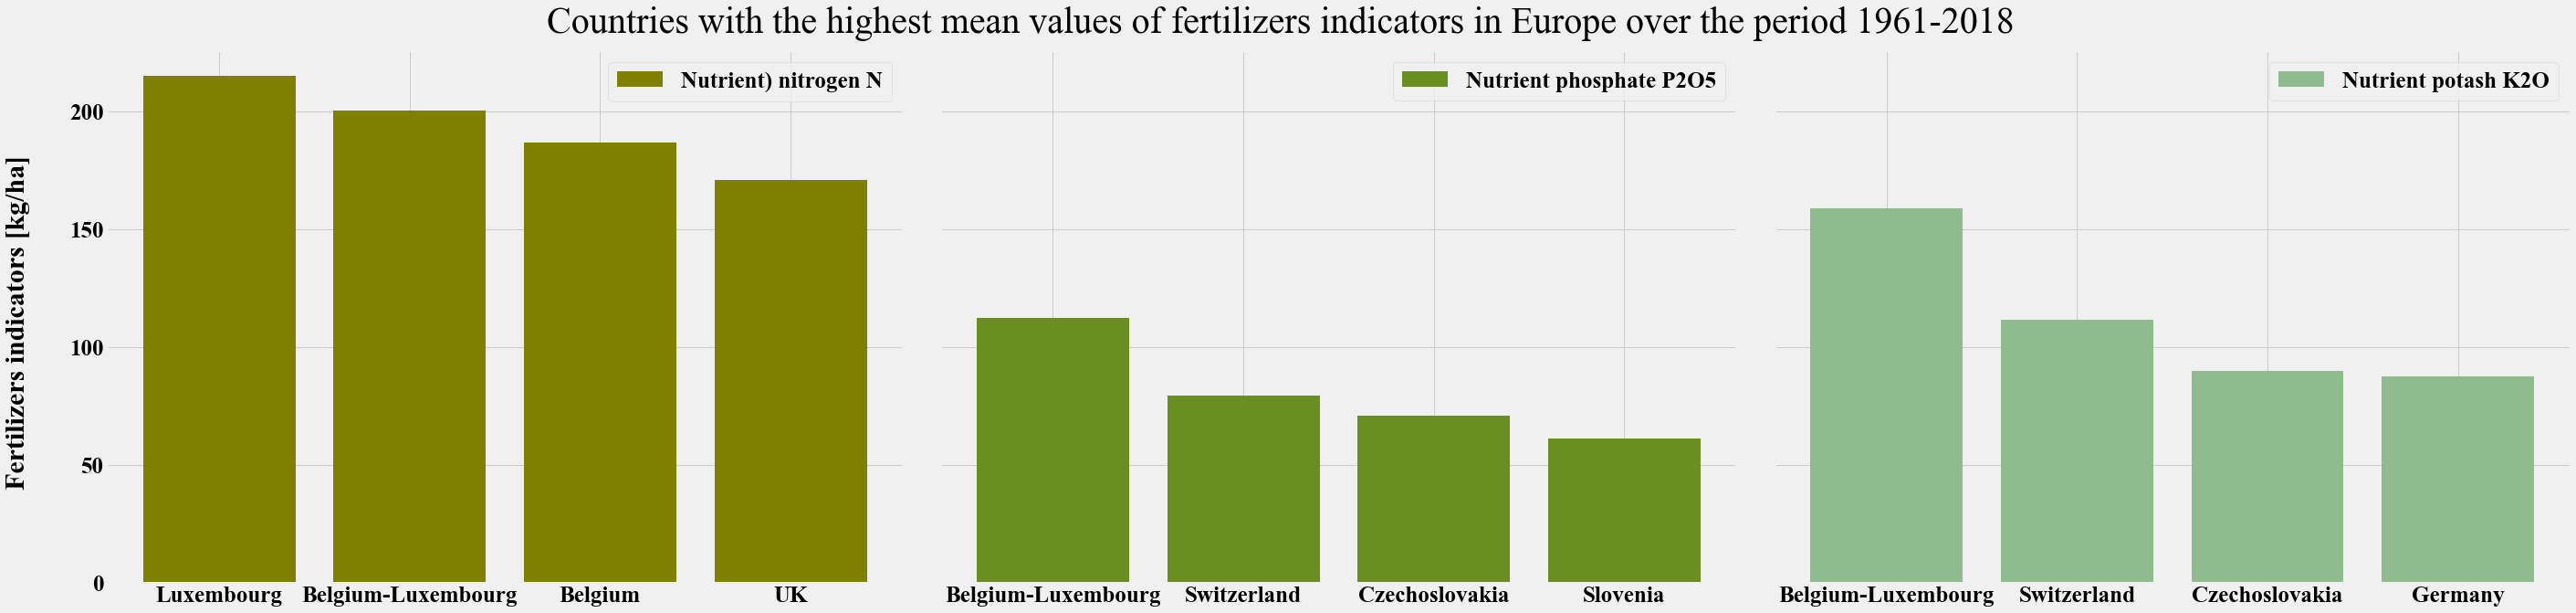

{'New Caledonia': 40.42022727272728, 'Fiji': 34.87741379310345, 'Australia': 24.644999999999996, 'French Polynesia': 14.015111111111114}


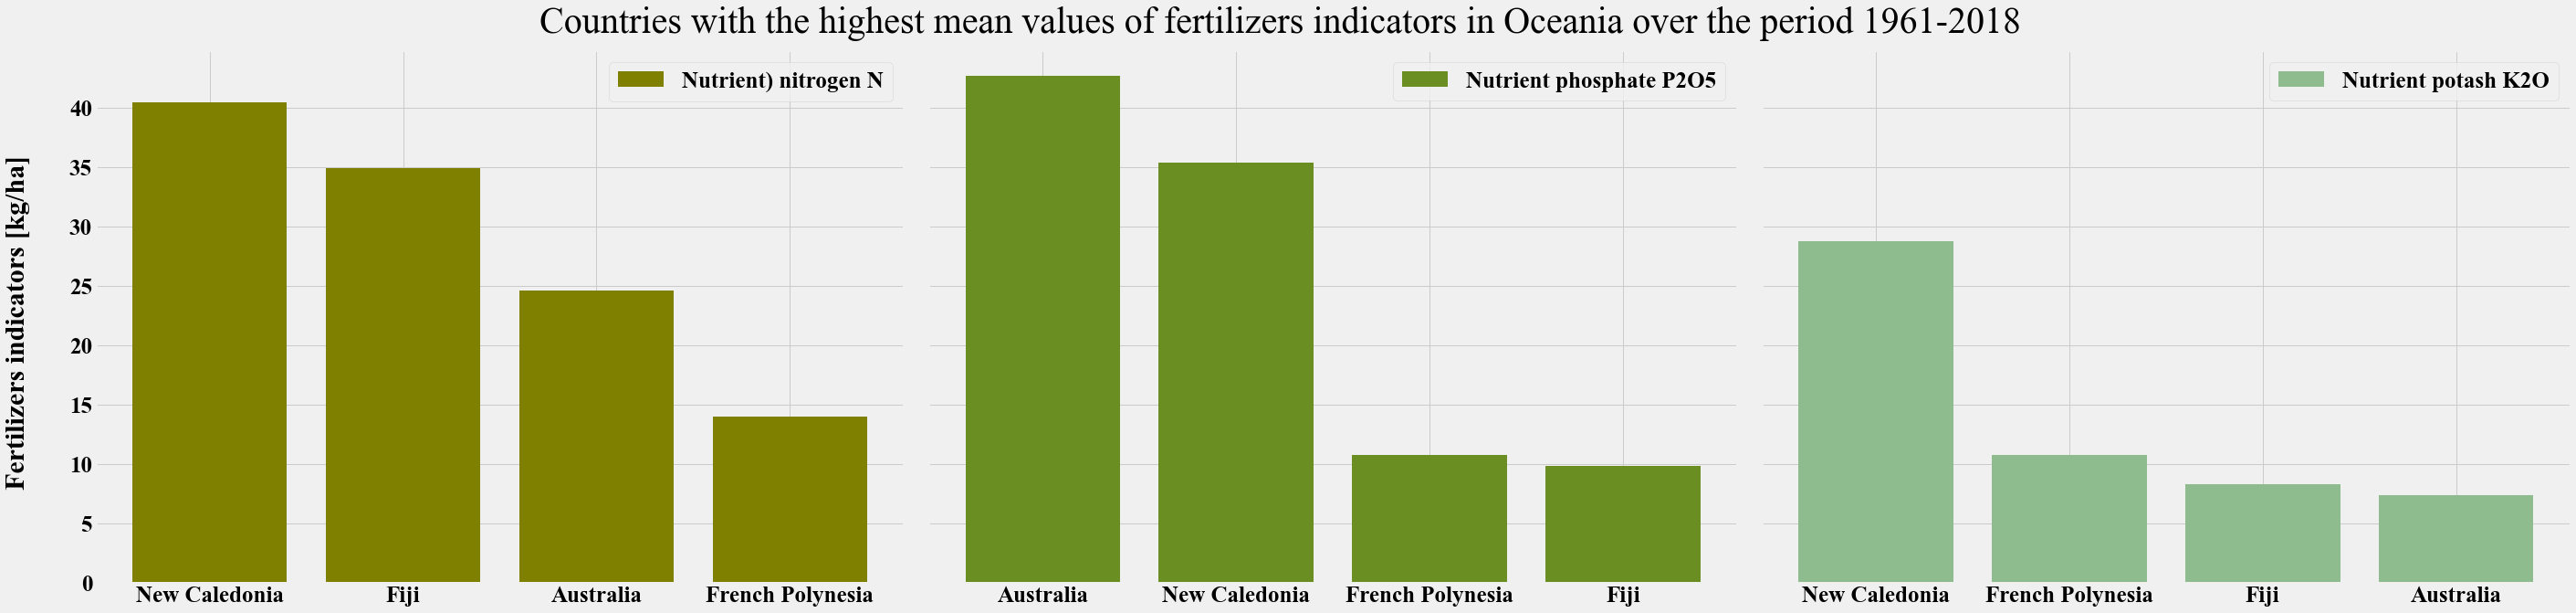

In [3]:
# Nutrients by (4) countries
# -----------------------------------------------------------------------------------------------------------------------

nutrients_africa = pd.read_csv('D:/studying/RheinWaalUni/3d semester/data procurement/nutrients_kg_ha/FAOSTAT_data_4-28-2021_(africa).csv')
nutrients_americas = pd.read_csv('D:/studying/RheinWaalUni/3d semester/data procurement/nutrients_kg_ha/FAOSTAT_data_4-28-2021_(americas).csv')
nutrients_asia = pd.read_csv('D:/studying/RheinWaalUni/3d semester/data procurement/nutrients_kg_ha/FAOSTAT_data_4-28-2021_(asia).csv')
nutrients_asia['Area'] = nutrients_asia['Area'].replace(['China, Taiwan Province of'], 'China, Taiwan')
nutrients_asia['Area'] = nutrients_asia['Area'].replace(['United Arab Emirates'], 'UAE')
nutrients_europe = pd.read_csv('D:/studying/RheinWaalUni/3d semester/data procurement/nutrients_kg_ha/FAOSTAT_data_4-28-2021_(europe).csv')
nutrients_europe['Area'] = nutrients_europe['Area'].replace(['United Kingdom of Great Britain and Northern Ireland'], 'UK')
nutrients_oceania = pd.read_csv('D:/studying/RheinWaalUni/3d semester/data procurement/nutrients_kg_ha/FAOSTAT_data_4-28-2021_(oceania).csv')


def plots_per_country(region_nutrients, region_name):
    nitrogen = dict(sorted(indicators_per_nutrient_mean(region_nutrients, 'Nutrient nitrogen N (total)').items(),
                           key=lambda x: x[1], reverse=True)[0:4])
    print(nitrogen)
    phosphate = dict(sorted(indicators_per_nutrient_mean(region_nutrients, 'Nutrient phosphate P2O5 (total)').items(),
                            key=lambda x: x[1], reverse=True)[0:4])
    potash = dict(sorted(indicators_per_nutrient_mean(region_nutrients, 'Nutrient potash K2O (total)').items(),
                         key=lambda x: x[1], reverse=True)[0:4])

    font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 25}
    plt.rc('font', **font)

    fig, ax = plt.subplots(1, 3, sharey='row', figsize=(40, 10))
    ax = ax.flatten()
    ax[0].bar(nitrogen.keys(), nitrogen.values(), color='olive', label='Nutrient) nitrogen N')
    ax[0].legend(loc="upper right")
    ax[1].bar(phosphate.keys(), phosphate.values(), color='olivedrab', label='Nutrient phosphate P2O5')
    ax[1].legend(loc="upper right")
    ax[2].bar(potash.keys(), potash.values(), color='darkseagreen', label='Nutrient potash K2O')
    ax[2].legend(loc="upper right")

    fig.tight_layout(rect=[0.03, 0.03, 1, 0.95])
    fig.text(0.02, 0.5, 'Fertilizers indicators [kg/ha]', ha='center', va='center', rotation='vertical', fontsize=30)
    #plt.ylabel('Fertilizers indicators [kg/ha]', fontsize=30)
    plt.suptitle('Countries with the highest mean values of fertilizers indicators in ' + region_name
                  + ' over the period 1961-2018', fontsize=40)
    plt.show()


plots_per_country(nutrients_africa, 'Africa')
plots_per_country(nutrients_americas, 'Americas')
plots_per_country(nutrients_asia, 'Asia')
plots_per_country(nutrients_europe, 'Europe')
plots_per_country(nutrients_oceania, 'Oceania')

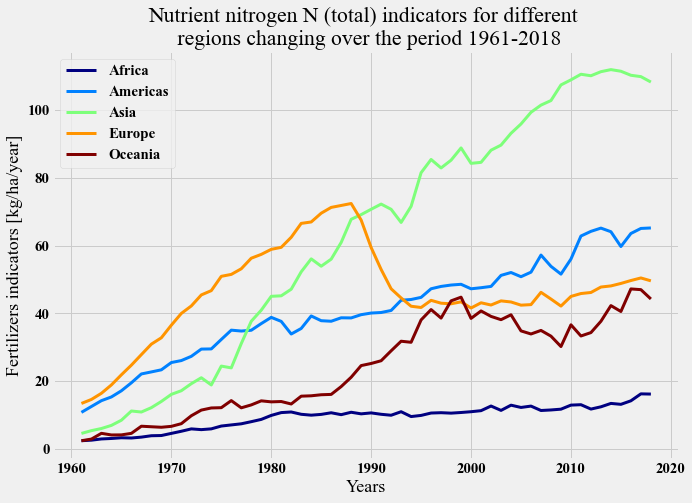

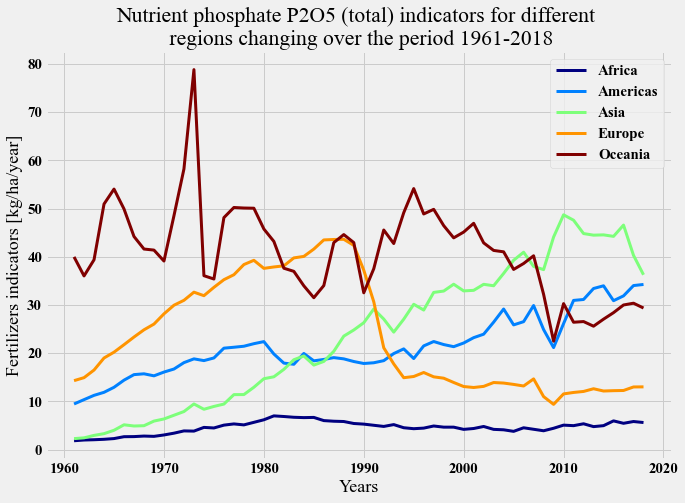

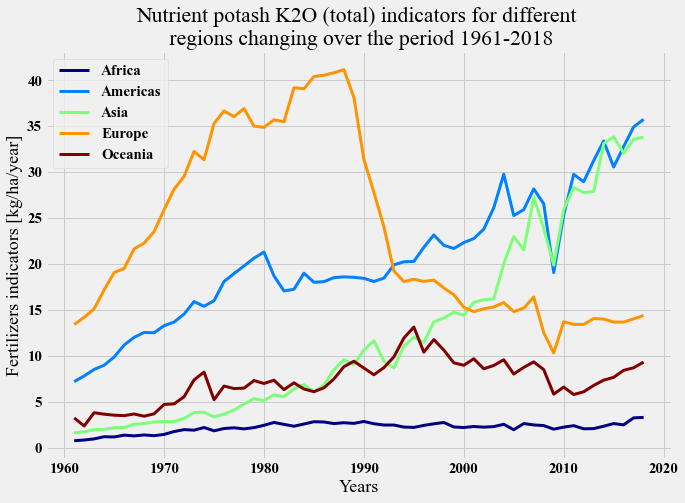

In [4]:
# Nutrients per region over time
# -----------------------------------------------------------------------------------------------------------------------


def plot_nutrients_overtime_in_region(nutrient_name):
    font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 15}
    plt.rc('font', **font)
    plt.figure(figsize=(10, 7))

    jet = plt.get_cmap('jet')
    colors = iter(jet(np.linspace(0, 1, 5)))

    for region in nutrients_region['Area'].unique():
        x = nutrients_region.loc[(nutrients_region['Area'] == region)
                              & (nutrients_region['Item'] == nutrient_name)]['Year']
        y = nutrients_region.loc[(nutrients_region['Area'] == region)
                              & (nutrients_region['Item'] == nutrient_name)]['Value']
        plt.plot(x, y, color=next(colors), label=region, linewidth=3.0)

    plt.ylabel('Fertilizers indicators [kg/ha/year]')
    plt.xlabel('Years')
    plt.title(nutrient_name + ' indicators for different \n regions changing over the period 1961-2018')
    plt.legend()
    plt.show()


plot_nutrients_overtime_in_region('Nutrient nitrogen N (total)')
plot_nutrients_overtime_in_region('Nutrient phosphate P2O5 (total)')
plot_nutrients_overtime_in_region('Nutrient potash K2O (total)')


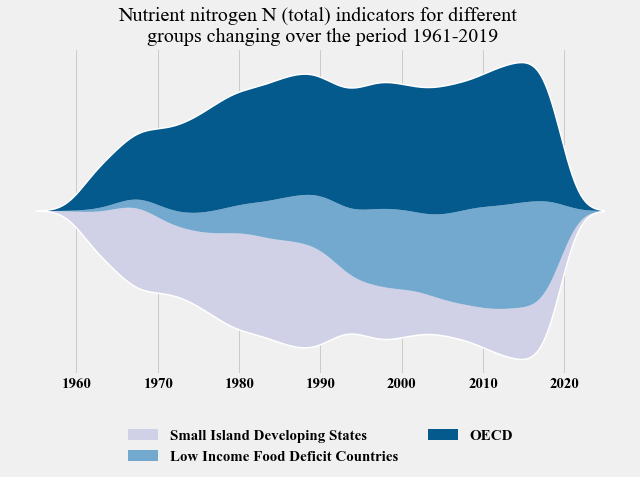

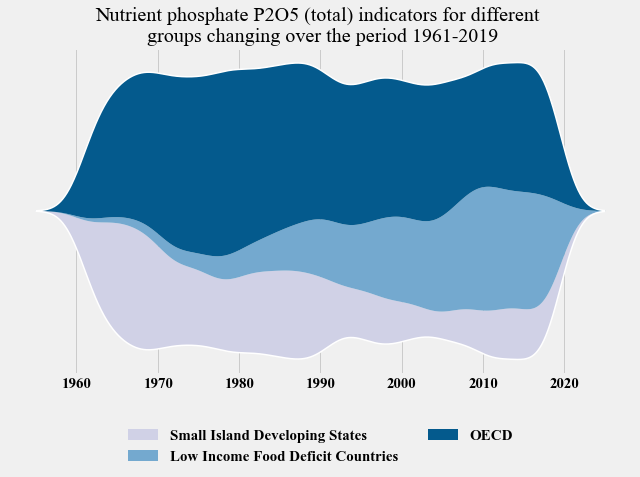

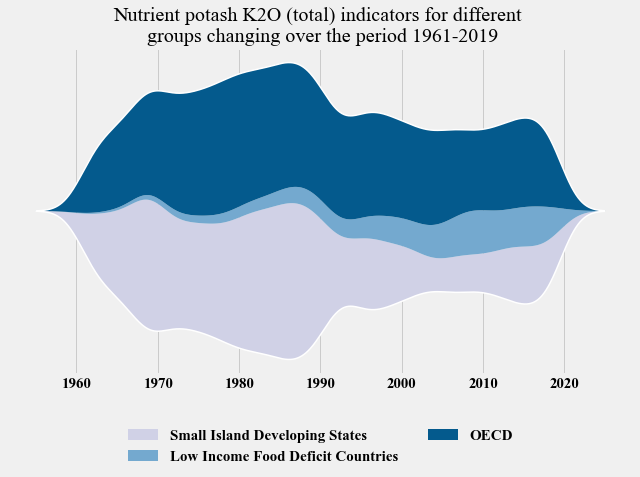

In [5]:
# Low Income Food Deficit Countries)

nutrients_special_groups = pd.read_csv('D:/studying/RheinWaalUni/3d semester/data procurement/nutrients_kg_ha/FAOSTAT_data_9-1-2021(special groups).csv')


def gaussian_smooth(x, y, grid, sd):
    weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x])
    weights = weights / weights.sum(0)
    return (weights * y).sum(1)


def plot_streamgraph(nutrient):
    x = nutrients_special_groups['Year'].unique()
    y = [nutrients_special_groups.loc[(nutrients_special_groups['Item'] == nutrient)
                                          & (nutrients_special_groups['Area'] == area)]['Value'].tolist()
         for area in nutrients_special_groups['Area'].unique()]
    labels = nutrients_special_groups['Area'].unique()


    fig, ax = plt.subplots(figsize=(10, 7))
    grid = np.linspace(1955, 2025, num=800)
    y_smoothed = [gaussian_smooth(x, y_, grid, 2) for y_ in y]
    ax.stackplot(grid, y_smoothed, baseline="sym", colors=['#D0D1E6', '#74A9CF', '#045A8D'], labels=labels)
    line = np.array(y_smoothed).sum(0)
    ax.plot(grid, line / 2, lw=1.5, color="white")
    ax.plot(grid, -line / 2, lw=1.5, color="white")
    ax.yaxis.set_visible(False)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.2,
                     box.width, box.height * 0.8])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
              fancybox=True, shadow=True, ncol=2, borderaxespad=0, frameon=False)
    plt.title(nutrient + ' indicators for different \n groups changing over the period 1961-2019', fontsize=20)
    plt.show()


plot_streamgraph('Nutrient nitrogen N (total)')
plot_streamgraph('Nutrient phosphate P2O5 (total)')
plot_streamgraph('Nutrient potash K2O (total)')


In [6]:
# def variation_coeff(dataset, nutrient):
#     for area in dataset['Area'].unique():
#         coefficient = dataset.loc[(dataset['Item'] == nutrient) & (dataset['Area'] == area)]['Value'].std() / \
#                     dataset.loc[(dataset['Item'] == nutrient) & (dataset['Area'] == area)]['Value'].mean()
#         print('{} - {} : {}'.format(area, nutrient, coefficient))
#
#
# variation_coeff(nutrients_special_groups, 'Nutrient nitrogen N (total)')
# variation_coeff(nutrients_special_groups, 'Nutrient phosphate P2O5 (total)')
# variation_coeff(nutrients_special_groups, 'Nutrient potash K2O (total)')
